# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import pandas as pd
import numpy as np

# Data

In [3]:
df = pd.read_csv("predictions/predictions_fwd.csv")

In [4]:
df['H/A'] = np.where(df['Was Home'] == 1, 'H', 'A')

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Squad',
       'Opponent', 'Start', 'Pos', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh',
       'SoT', 'CrdY', 'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG',
       'xAG', 'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'PrgP', 'Carries', 'PrgC',
       'Att.1', 'Succ', 'Match Report', 'Name', 'Season', 'WDL', 'GoalsTeams',
       'Team Score', 'Opp Score', 'CS', 'Was Home', 'GW', 'FPL',
       'neutral_name', 'Total Points', 'FPL position', 'Opp rating',
       'ScoreForLast5', 'ScoreAgainstLast5', 'Points', 'H/A'],
      dtype='object')

In [6]:
df.iloc[0]

Unnamed: 0                     3501
Date                     2023-01-23
Day                             Mon
Comp                 Premier League
Round                  Matchweek 21
Venue                          Away
Squad                     Tottenham
Opponent                     Fulham
Start                             Y
Pos                              FW
Min                            90.0
Gls                             1.0
Ast                             0.0
PK                              0.0
PKatt                           0.0
Sh                              6.0
SoT                             2.0
CrdY                            0.0
CrdR                            0.0
Touches                        34.0
Tkl                             1.0
Int                             0.0
Blocks                          0.0
xG                              0.7
npxG                            0.7
xAG                             0.0
SCA                             1.0
GCA                         

# Plot table

In [7]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

import plottable
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

In [8]:
df = df.rename(columns={"Squad": "Team", "Points": "Prediction"}, errors="raise")

In [9]:
cols = [
    "Name",
    "Team",
    "Opponent",
    "H/A",
    "Prediction"
]

In [10]:
df = df[cols]
df = df.set_index("Name")

In [11]:
cmap = LinearSegmentedColormap.from_list(
    name="points_cmap", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=512
)

In [18]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

In [27]:
col_defs = (
    [
        ColumnDefinition(
            name="Name",
            textprops={"ha": "center", "weight": "bold"},
            width=1,
        ),
        ColumnDefinition(
            name="Team",
            textprops={"ha": "center"},
            width=1,
        ),
        ColumnDefinition(
            name="Opponent",
            textprops={"ha": "center"},
            width=1,
        ),
        ColumnDefinition(
            name="H/A",
            textprops={"ha": "center"},
            width=0.6,
        ),
        ColumnDefinition(
            name="Prediction",
            textprops={"ha": "center"},
            width=0.75,
            cmap=normed_cmap(df["Prediction"], cmap=cmap)
        )
    ]
)

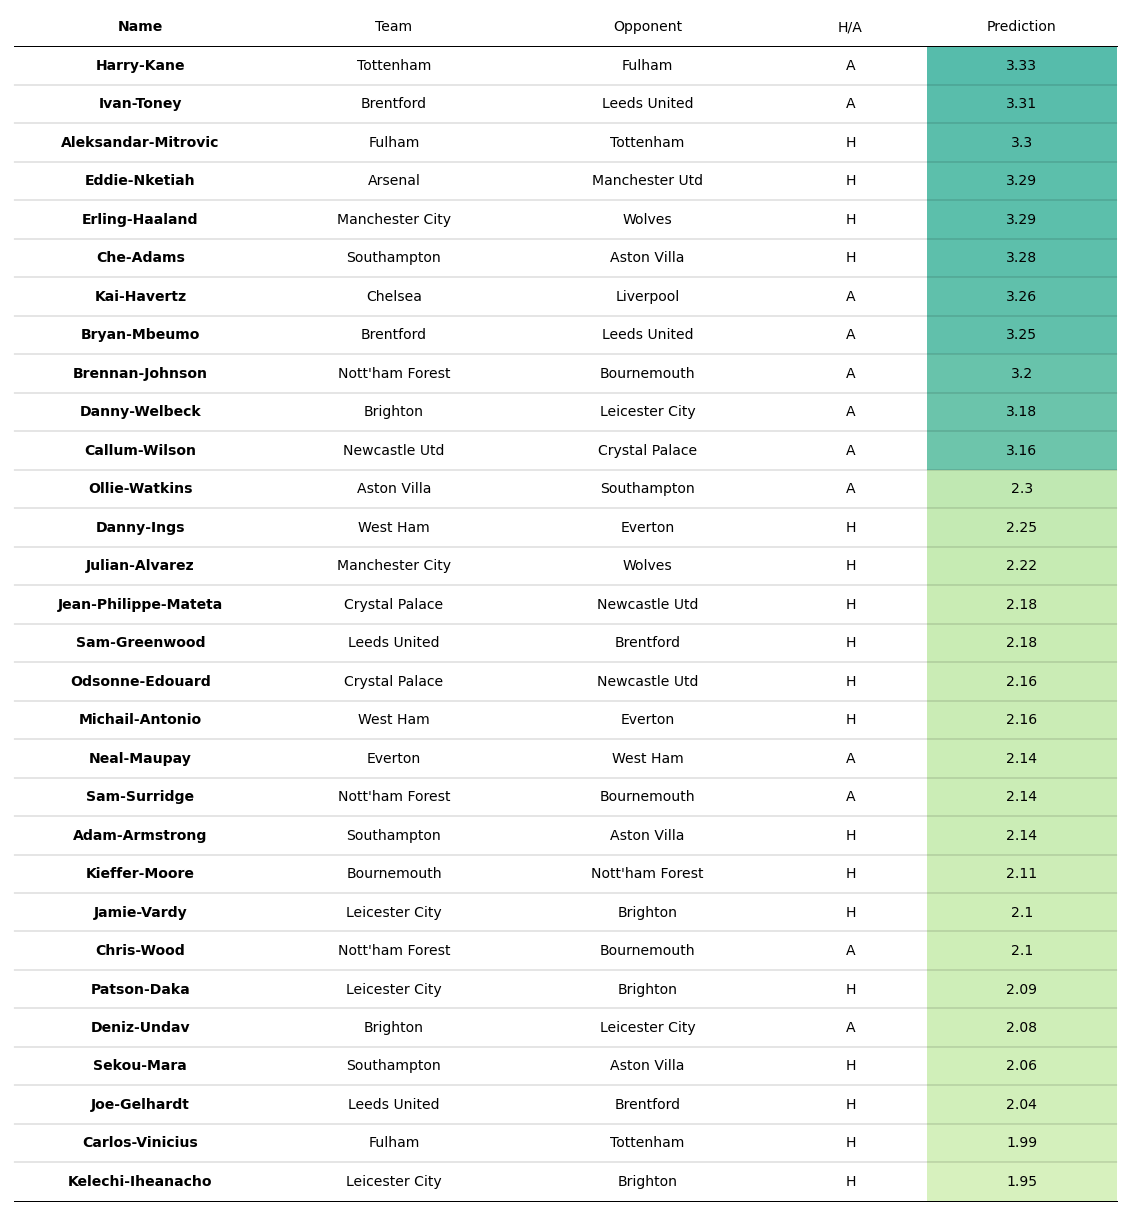

In [30]:
fig, ax = plt.subplots(figsize=(20, 22))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)